In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv
/kaggle/input/classification-of-oil-and-gas-fields/oil_test.csv


# 🤖 | **M1. Loading data / Загрузка данных**

In [4]:
test_data = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/oil_test.csv')
train_data = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv')

Displaying Head (train & test data)

In [5]:
display(train_data.head())
display(test_data.head())

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,IEOC,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,ALIBEKMOLA,KT I,KAZAKHSTAN,FORMER SOVIET UNION,CASPIAN NORTH,COMPRESSION/EVAPORITE,48.4740,57.6667,KAZAKHOIL AKTOBE,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,ALWYN NORTH,BRENT (BRENT EAST),UK,EUROPE,NORTH SEA NORTHERN,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,TOTAL,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,ANKLESHWAR,ANKLESHWAR (HAZAD-ARDOL),INDIA,FAR EAST,CAMBAY,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,ONGC,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


In [6]:
# Первичный анализ
print(train_data.info())
print(train_data.describe(include='all')) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Общее количество записей: 309
Количество признаков: 20

Типы данных:
object     13
float64     6
int64       1
Name: count, dtype: int64


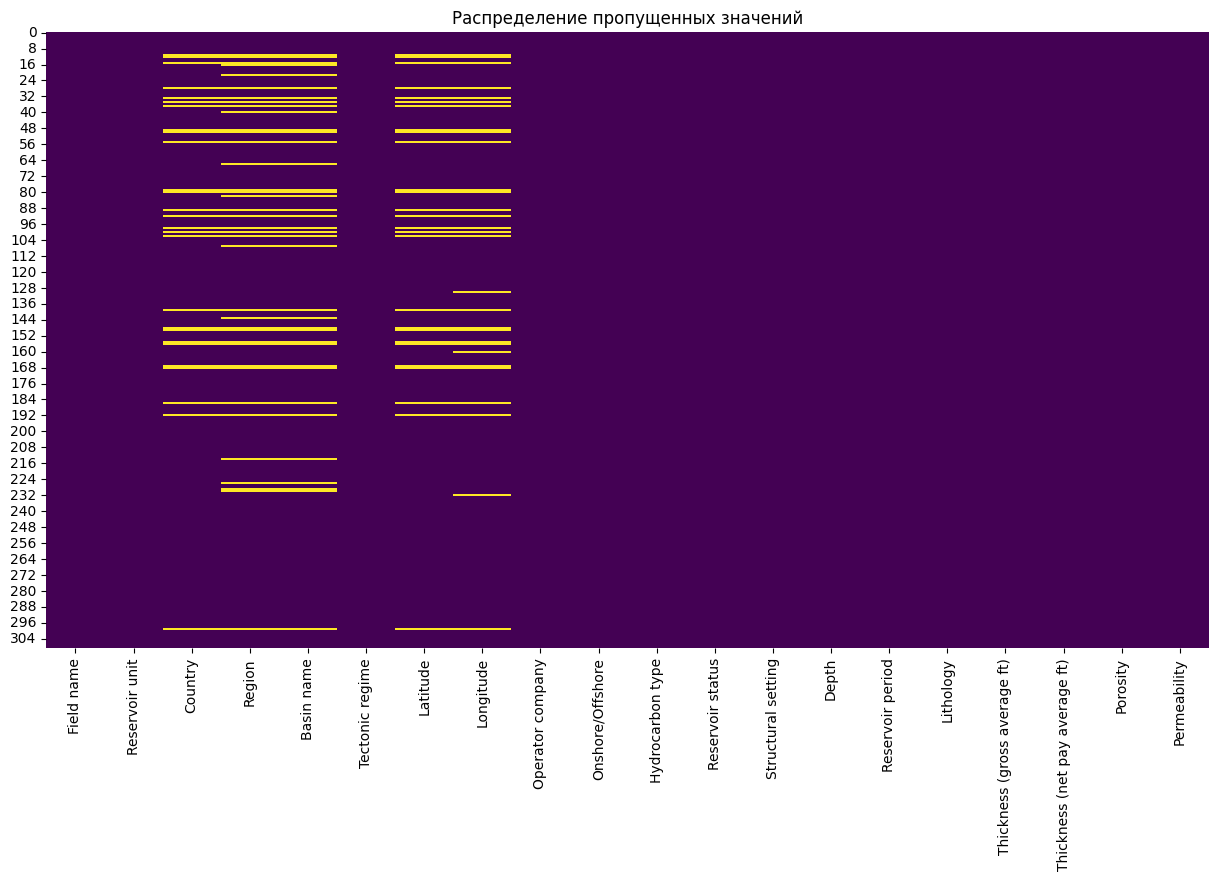

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv')


# Основная информация
print(f"Общее количество записей: {df.shape[0]}")
print(f"Количество признаков: {df.shape[1]}")
print("\nТипы данных:")
print(df.dtypes.value_counts())

# Визуализация пропущенных значений
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Распределение пропущенных значений')
plt.show()

In [8]:
# Выбор числовых признаков
numeric_features = ['Latitude', 'Longitude', 'Depth', 
                   'Thickness (gross average ft)', 
                   'Thickness (net pay average ft)', 
                   'Porosity', 'Permeability']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

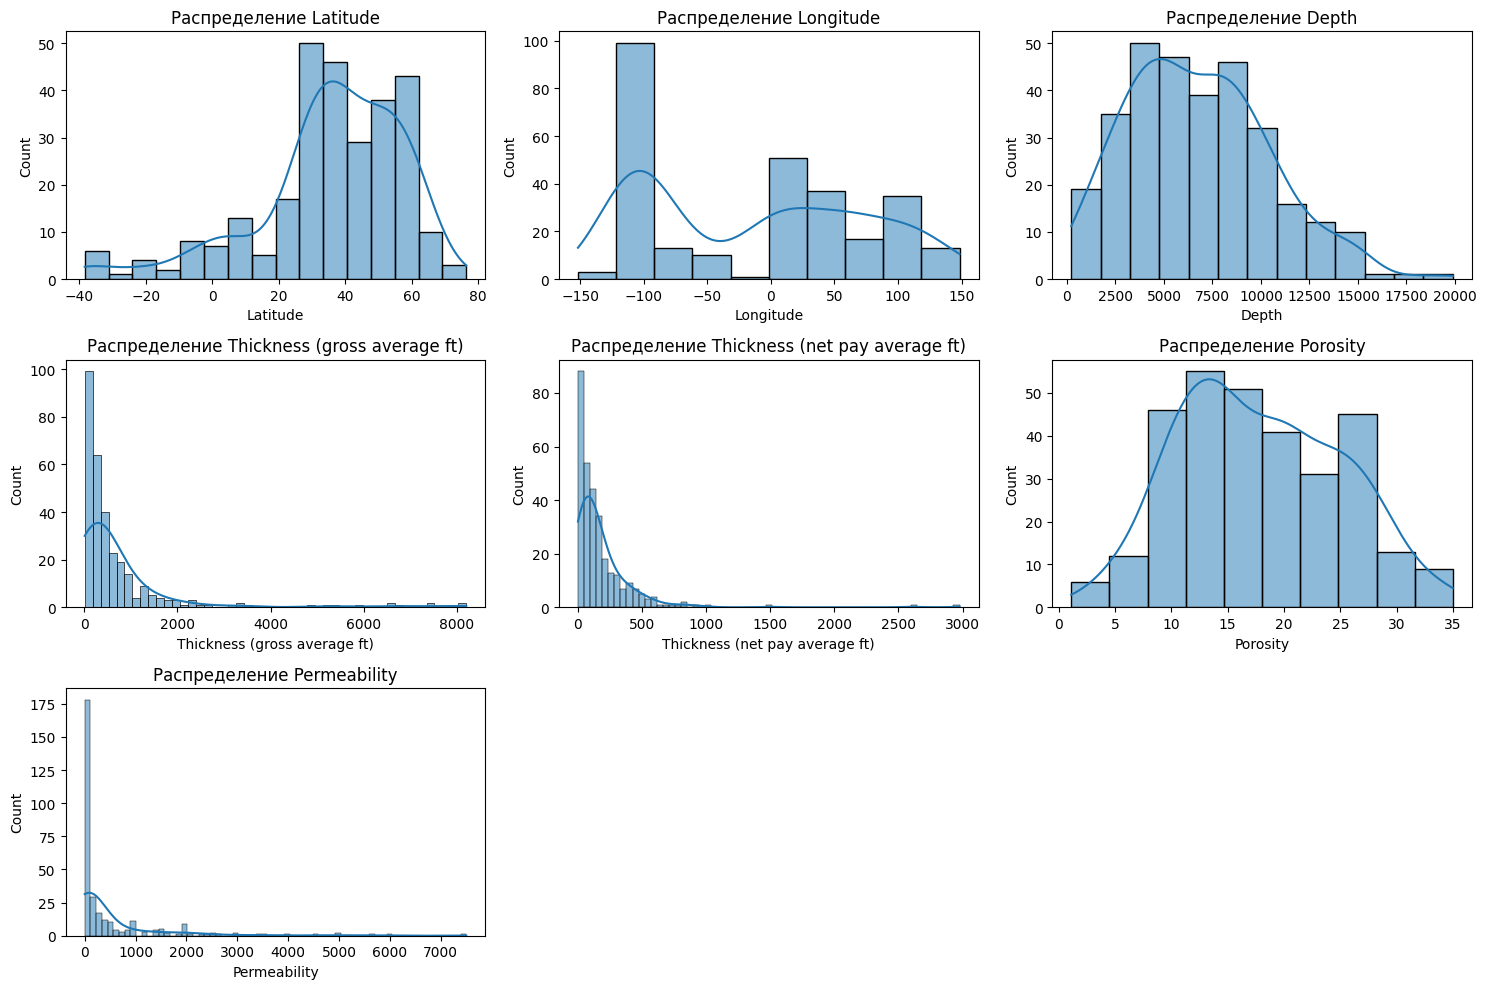

In [9]:
# Визуализация распределений
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

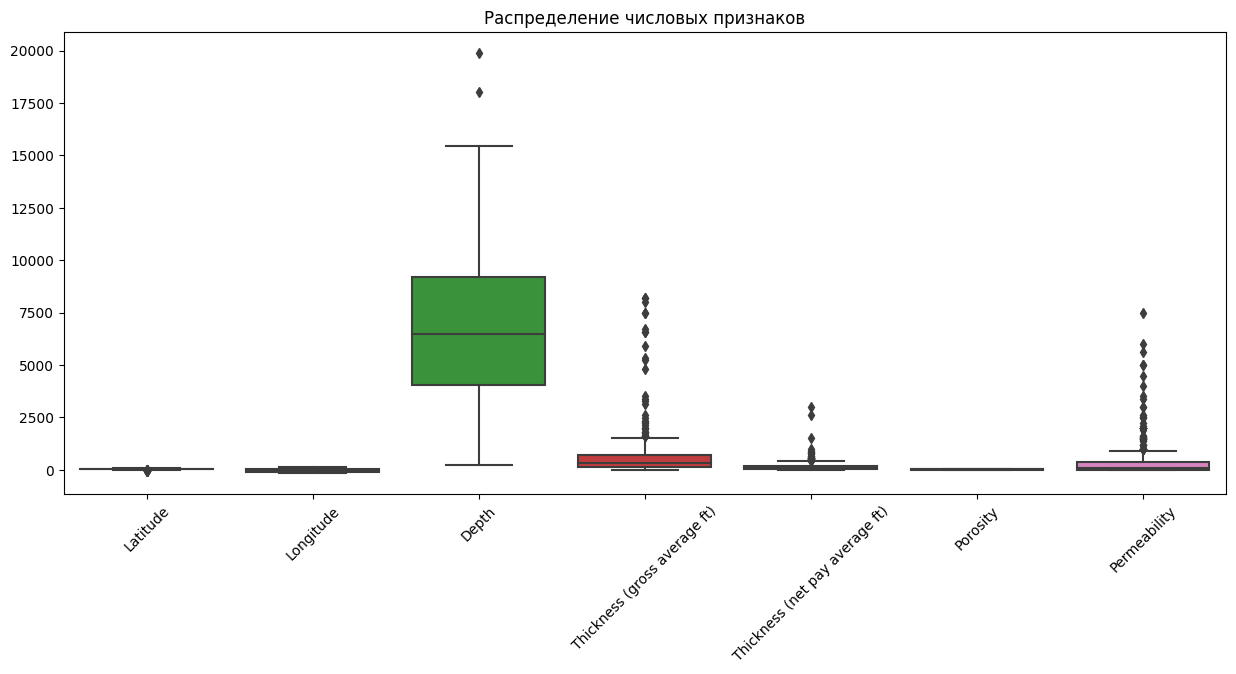

In [10]:
# Анализ выбросов
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_features])
plt.title('Распределение числовых признаков')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Выбор категориальных признаков
cat_features = ['Tectonic regime', 'Operator company', 
               'Hydrocarbon type', 
               'Structural setting', 'Reservoir period', 
               'Lithology']

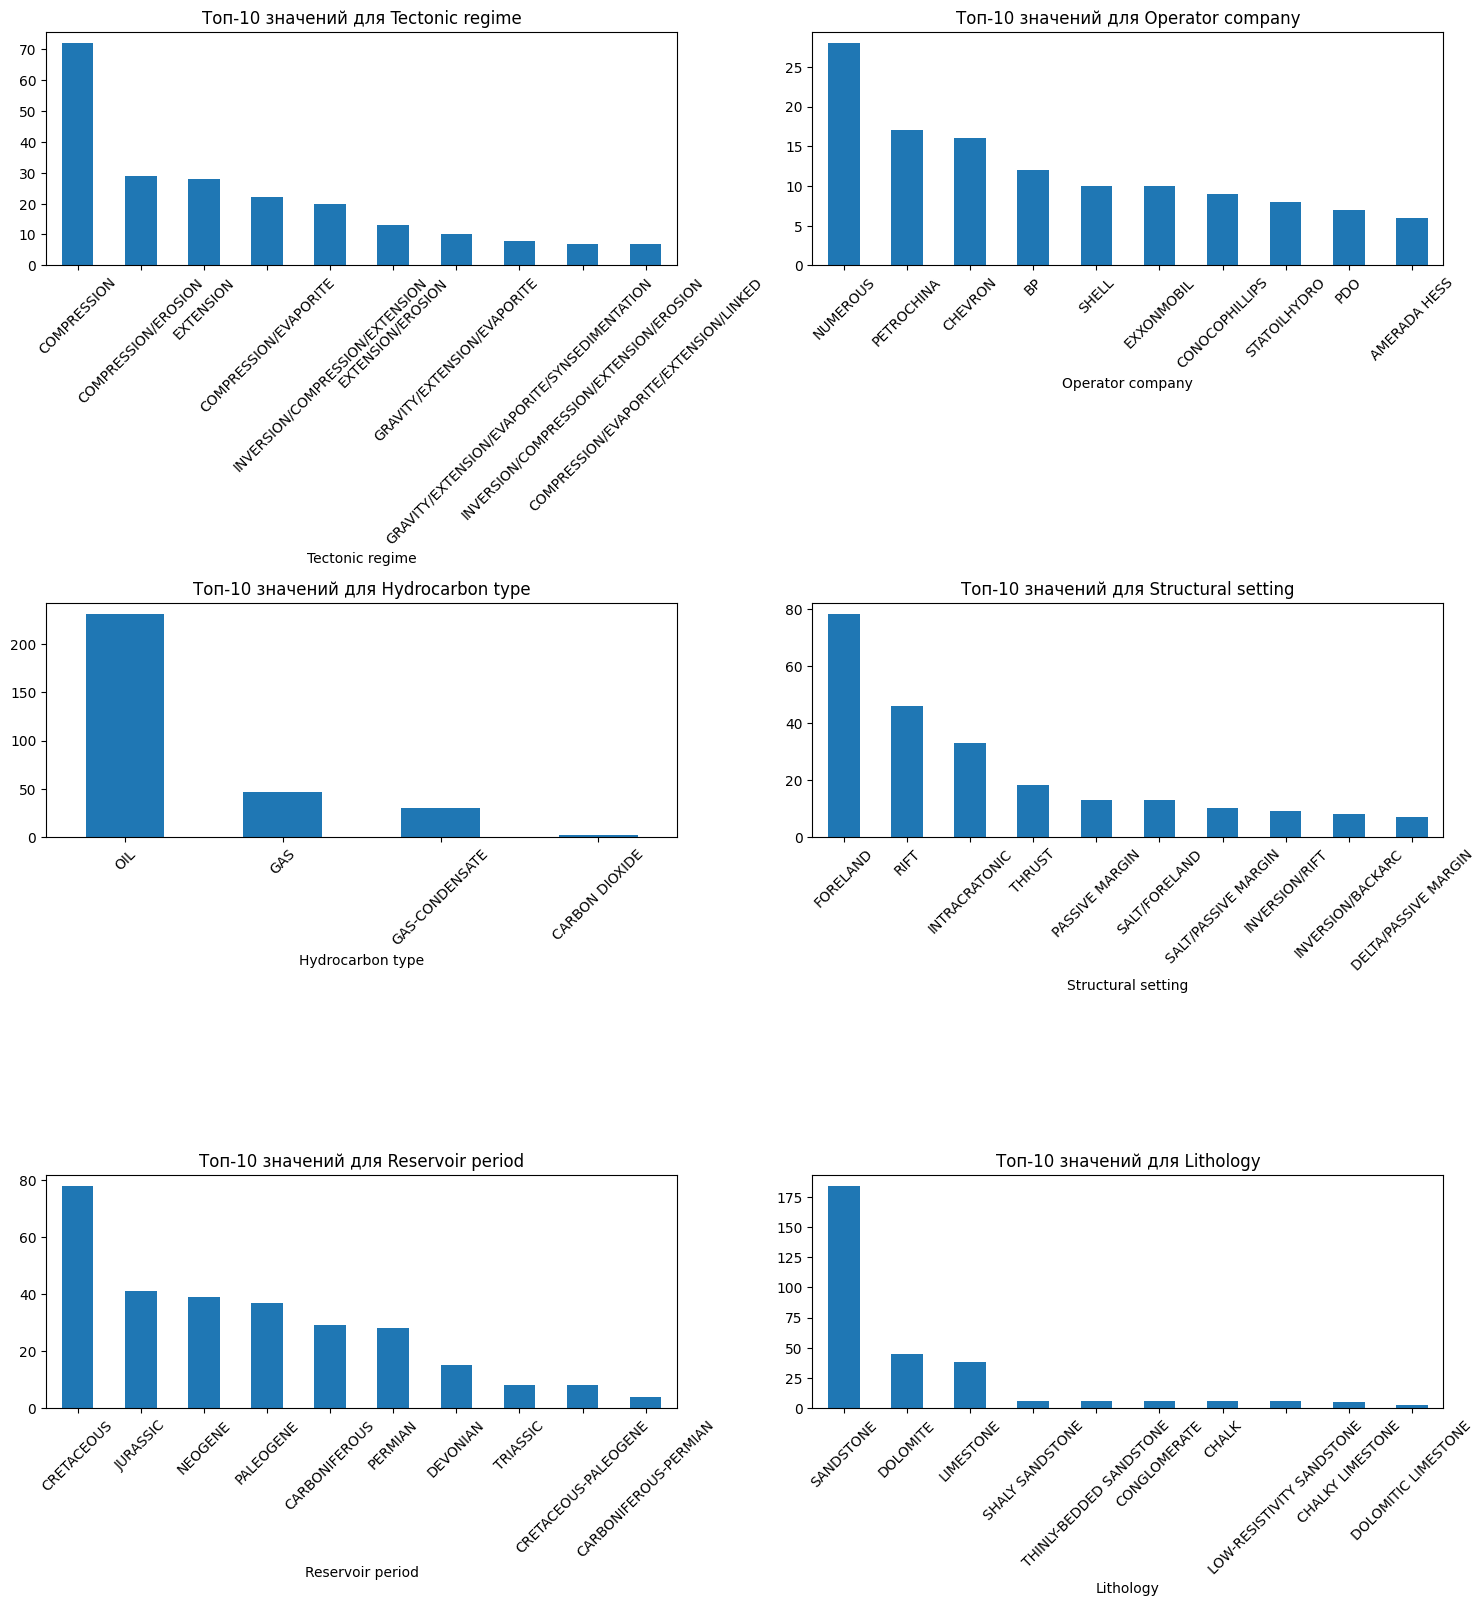

In [17]:
# Визуализация частотности
plt.figure(figsize=(15,20))
for i, col in enumerate(cat_features):
    plt.subplot(4,2,i+1)
    df[col].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Топ-10 значений для {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Геопространственный анализ**

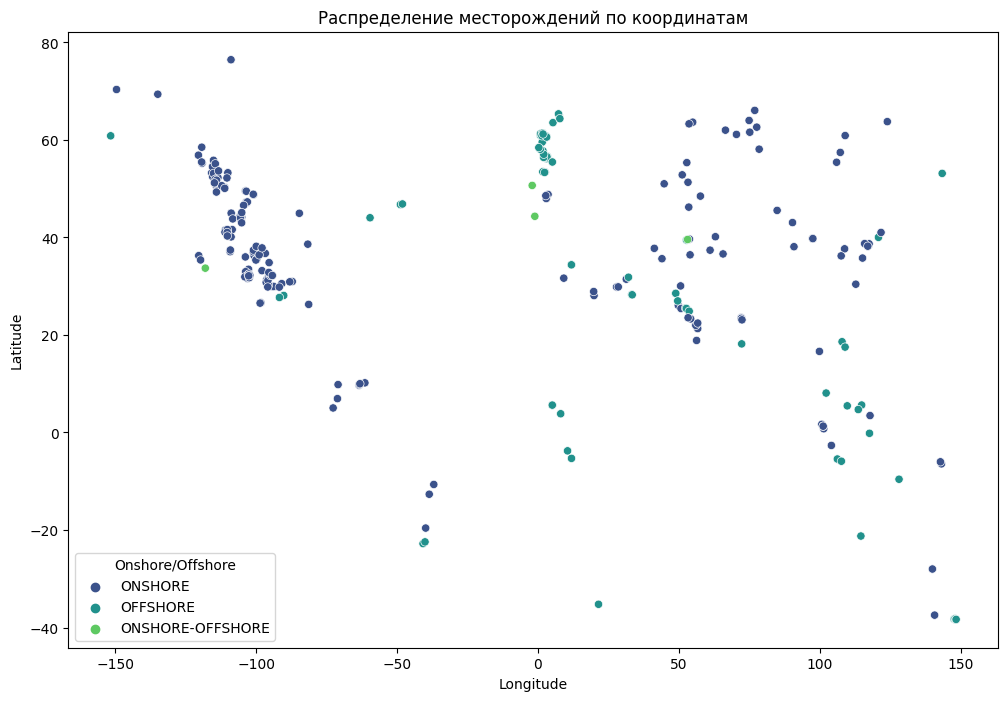

In [18]:
# Визуализация местоположения месторождений
plt.figure(figsize=(12,8))
sns.scatterplot(x='Longitude', y='Latitude', 
                hue='Onshore/Offshore', 
                data=df, palette='viridis')
plt.title('Распределение месторождений по координатам')
plt.show()

In [20]:

# Проверяем, есть ли пропущенные значения
print(df[['Latitude', 'Longitude']].isnull().sum())

Latitude     27
Longitude    30
dtype: int64


In [21]:
df = df.dropna(subset=['Latitude', 'Longitude'])

In [23]:
from sklearn.cluster import DBSCAN
import numpy as np

# Преобразуем координаты в массив numpy
coords = df[['Latitude', 'Longitude']].to_numpy()

# Кластеризация
db = DBSCAN(eps=0.1, min_samples=10, metric='haversine').fit(np.radians(coords))
df['Cluster'] = db.labels_

**Что делает этот код?**

* Использует **DBSCAN** для объединения точек в кластеры.
* eps=0.1 — расстояние между точками в градусах (≈11 км).
* min_samples=10 — минимум 10 точек в одном кластере.

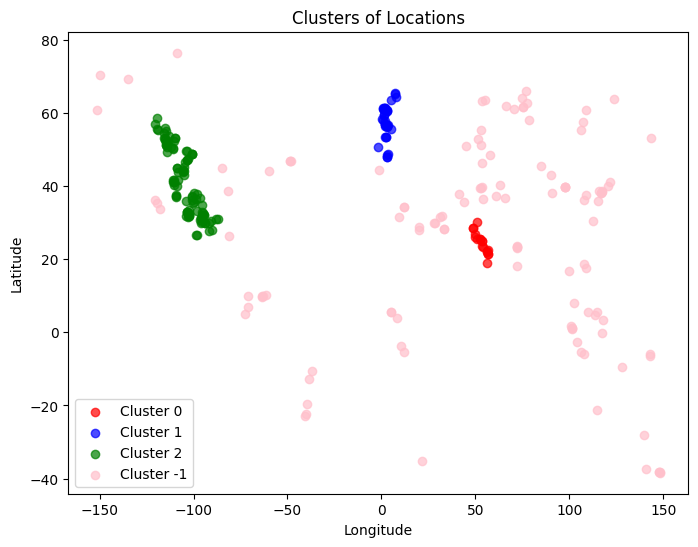

In [24]:
import matplotlib.pyplot as plt

# Палитра цветов
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']

plt.figure(figsize=(8, 6))
for cluster in set(df['Cluster']):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'],
                color=colors[cluster % len(colors)], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters of Locations")
plt.legend()
plt.show()

In [25]:
print(df['Cluster'].value_counts())

Cluster
-1    123
 2     99
 1     39
 0     18
Name: count, dtype: int64


In [26]:
from sklearn.cluster import DBSCAN

# Увеличиваем радиус (eps) и уменьшаем min_samples
dbscan = DBSCAN(eps=8.0, min_samples=5)  # eps увеличен
df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])

print(df['Cluster'].value_counts())

Cluster
 2     100
-1      46
 1      40
 0      31
 8      11
 5       9
 7       8
 3       7
 6       7
 10      6
 4       5
 9       5
 11      4
Name: count, dtype: int64


In [27]:
import folium

# Создаем карту, центрируя на средних координатах
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Цвета для кластеров
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']

# Добавляем точки на карту
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colors[row['Cluster'] % len(colors)] if row['Cluster'] != -1 else 'gray',
        fill=True,
        fill_color=colors[row['Cluster'] % len(colors)] if row['Cluster'] != -1 else 'gray',
        popup=f"Cluster: {row['Cluster']}"
    ).add_to(m)

m

Всего у нас 12 кластеров (0-11) + 46 шумовых точек (-1).

Логические названия кластерам, с учётом данных карты:

Cluster ID	Название	Расположение (примерно)
0	Европейский кластер	Европа (синий)
1	Африканский кластер	Африка, Ближний Восток (красный)
2	Североамериканский кластер	США, Мексика (зеленый)
3	Юго-Восточная Азия	Тайланд, Вьетнам (черный)
4	Океания	Австралия (розовый)
5	Южная Америка	Южная Америка (фиолетовый)
6	Россия и СНГ	Россия, Казахстан (коричневый)
7	Китайский кластер	Китай (черный)
8	Ближний Восток	Иран, Турция (красный)
9	Индия	Индийский субконтинент (оранжевый)
10	Южноазиатский кластер	Индонезия, Малайзия (зеленый)
11	Разрозненные точки	Разные места (минимальный кластер)
-1	Шум (Outliers)	Разбросанные точки

In [29]:
dbscan = DBSCAN(eps=4.0, min_samples=5)  # Чуть больше eps
df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])

**Feature Engineering**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report





In [31]:
# === 1. ЗАГРУЗКА ДАННЫХ ===
df = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv')

# === 2. ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ (EDA) ===
print("Общая информация о данных:")
print(df.info())
print("\nОписание числовых данных:")
print(df.describe())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structura

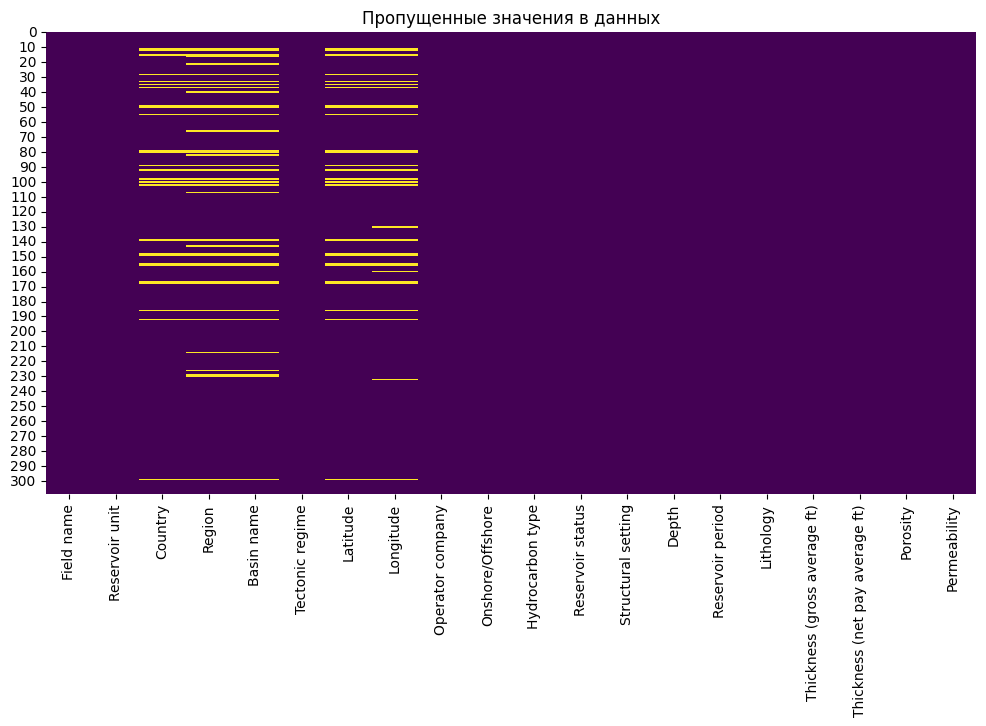

In [32]:


# Визуализация пропущенных значений
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в данных')
plt.show()

In [65]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Загрузка данных
train = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv')
test = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/oil_test.csv')

In [68]:
# EDA (Exploratory Data Analysis)
print("Тренировочные данные:")
print(train.info())
print("\nПример данных:")
print(train.head())

Тренировочные данные:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural set

In [69]:

# Проверка распределения целевой переменной
print("\nРаспределение целевой переменной:")
print(train['Onshore/Offshore'].value_counts())


Распределение целевой переменной:
Onshore/Offshore
ONSHORE             218
OFFSHORE             86
ONSHORE-OFFSHORE      5
Name: count, dtype: int64


In [70]:
# Анализ пропущенных данных
print("\nПропущенные значения в тренировочных данных:")
print(train.isnull().sum())


Пропущенные значения в тренировочных данных:
Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64


In [71]:
# Data Engineering
# Заполнение пропущенных значений
train['Lithology'].fillna('Unknown', inplace=True)
test['Lithology'].fillna('Unknown', inplace=True)

In [72]:
# Выбор признаков и целевой переменной
features = ['Latitude', 'Longitude', 'Depth', 'Porosity', 'Permeability', 'Lithology']
target = 'Onshore/Offshore'

In [73]:
# Преобразование категориальных признаков
le = LabelEncoder()
train['Lithology'] = le.fit_transform(train['Lithology'])
test['Lithology'] = le.transform(test['Lithology'])


ValueError: y contains previously unseen labels: 'DIATOMITE'

In [79]:
# Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [81]:
# 1. Загрузка данных
train_data = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv')
test_data = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/oil_test.csv')

In [82]:
# 2. Определение целевой переменной и признаков
target = 'Onshore/Offshore'
X_train = train_data.drop(columns=[target])  # Признаки обучающей выборки
y_train = train_data[target]                 # Целевая переменная
X_test = test_data                           # Тестовая выборка

In [84]:
# 3. Обработка пропущенных значений
# Числовые признаки: заполняем медианой
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [85]:
# Категориальные признаки: заполняем наиболее частым значением
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [86]:
# 4. Преобразование категориальных признаков в числовые (One-Hot Encoding)
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [87]:
# Приведение тестовых данных к тем же колонкам, что в обучающих
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [89]:
# 5. Преобразование целевой переменной в числовой формат
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [90]:
# 6. Разделение данных на обучающую и валидационную выборки (для проверки)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [91]:
# 7. Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [92]:
# 8. Проверка на валидационной выборке (опционально)
y_val_pred = model.predict(X_val)
print("Результаты на валидационной выборке:")
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

Результаты на валидационной выборке:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71        18
           1       0.83      1.00      0.91        43
           2       0.00      0.00      0.00         1

    accuracy                           0.85        62
   macro avg       0.61      0.52      0.54        62
weighted avg       0.86      0.85      0.84        62



In [94]:
# 9. Предсказание на тестовых данных
y_test_pred = model.predict(X_test)

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

In [2]:
# 1. Загрузка данных
train_data = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/train_oil.csv')
test_data = pd.read_csv('/kaggle/input/classification-of-oil-and-gas-fields/oil_test.csv')

In [3]:
# 2. Определение целевой переменной и признаков
target = 'Onshore/Offshore'  # Целевая переменная
X_train = train_data.drop(columns=[target])  # Признаки обучающей выборки
y_train = train_data[target]  # Целевая переменная
X_test = test_data  # Тестовая выборка

In [5]:
# 3. Обработка пропущенных значений
# Разделяем признаки на числовые и категориальные
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [8]:
# Заполняем пропуски в числовых данных медианой
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [9]:
# Заполняем пропуски в категориальных данных наиболее частым значением
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [10]:
# 4. Преобразование категориальных признаков
# Используем One-Hot Encoding для категориальных переменных
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [11]:
# Приводим тестовую выборку к тем же колонкам, что в обучающей
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [13]:
# 5. Масштабирование числовых признаков
# Стандартизация помогает улучшить работу модели
scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_encoded[num_cols])

In [15]:
# 6. Кодирование целевой переменной
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [22]:
# 7. Разделение данных для валидации
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded
)

In [24]:
# 8. Обучение модели XGBoost (более мощная альтернатива RandomForest)
model = xgb.XGBClassifier(
    n_estimators=200,          # Увеличенное число деревьев
    max_depth=5,              # Ограничение глубины для предотвращения переобучения
    learning_rate=0.05,       # Меньший шаг обучения для лучшей сходимости
    subsample=0.8,            # Использование 80% данных для каждого дерева
    colsample_bytree=0.8,     # Использование 80% признаков для каждого дерева
    random_state=42,
    eval_metric='mlogloss'    # Метрика для многоклассовой классификации
)

In [25]:
# Обучение модели
model.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
# 9. Оценка модели на валидационной выборке
y_val_pred = model.predict(X_val)
print("Результаты на валидационной выборке:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

Результаты на валидационной выборке:
                  precision    recall  f1-score   support

        OFFSHORE       0.85      0.65      0.73        17
         ONSHORE       0.86      0.95      0.90        44
ONSHORE-OFFSHORE       0.00      0.00      0.00         1

        accuracy                           0.85        62
       macro avg       0.57      0.53      0.55        62
    weighted avg       0.84      0.85      0.84        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# 10. Кросс-валидация для более надежной оценки
cv_scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
print(f"Средняя точность кросс-валидации: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")



Средняя точность кросс-валидации: 0.858 ± 0.035


In [36]:
# 11. Предсказание на тестовых данных
y_test_pred = model.predict(X_test_scaled)

# Проверка, что предсказания — это числа
print("Тип данных предсказаний y_test_pred:", y_test_pred.dtype)
print("Первые 5 предсказанных значений:", y_test_pred[:5])

Тип данных предсказаний y_test_pred: int64
Первые 5 предсказанных значений: [1 0 1 0 1]


In [38]:
# 12. Подготовка и сохранение результата

# Сохраняем предсказания в отдельную переменную для проверки
y_test_pred_labels = le.inverse_transform(y_test_pred)
print("Первые 5 преобразованных меток:", y_test_pred_labels[:5])

submission = pd.DataFrame({
    'index': test_data.index,
    'Onshore/Offshore': y_test_pred_labels
})

# Проверка типов данных в столбце 'Onshore/Offshore'
print("Типы данных в submission:")
print(submission.dtypes)

# Проверка уникальных значений в столбце 'Onshore/Offshore'
print("Уникальные значения в 'Onshore/Offshore':")
print(submission['Onshore/Offshore'].unique())

Первые 5 преобразованных меток: ['ONSHORE' 'OFFSHORE' 'ONSHORE' 'OFFSHORE' 'ONSHORE']
Типы данных в submission:
index                int64
Onshore/Offshore    object
dtype: object
Уникальные значения в 'Onshore/Offshore':
['ONSHORE' 'OFFSHORE']


In [39]:
# Убедимся, что все значения в 'Onshore/Offshore' — строки
submission['Onshore/Offshore'] = submission['Onshore/Offshore'].astype(str)

In [43]:
submission['Onshore/Offshore'] = submission['Onshore/Offshore'].fillna('ONSHORE')  # Или другое значение

In [44]:
print("Тип данных предсказаний:", y_test_pred.dtype)  # Должно быть int или float
print("Первые 5 предсказаний:", y_test_pred[:5])      # Например, [0, 1, 2, 1, 0]

Тип данных предсказаний: int64
Первые 5 предсказаний: [1 0 1 0 1]


In [45]:
# Преобразование чисел в строки
y_test_pred_labels = le.inverse_transform(y_test_pred)
print("Первые 5 меток:", y_test_pred_labels[:5])      # Проверка строк


Первые 5 меток: ['ONSHORE' 'OFFSHORE' 'ONSHORE' 'OFFSHORE' 'ONSHORE']


In [46]:

# Создание таблицы
submission = pd.DataFrame({
    'index': test_data.index,
    'Onshore/Offshore': y_test_pred_labels
})
print("Типы данных в submission:", submission.dtypes)  # Проверка типов данных



Типы данных в submission: index                int64
Onshore/Offshore    object
dtype: object


In [47]:
# Принудительное преобразование в строки
submission['Onshore/Offshore'] = submission['Onshore/Offshore'].astype(str)


In [52]:

# Сохранение файла
submission.to_csv('submission.csv', index=False)
print("submission.csv успешно сохранён!")

submission.csv успешно сохранён!
